# **ML Project - Predicting Customer Lifetime Value** 
## Module 2: HyperParameter Tuning


------



<br>
Authors: Ayesha Naime (356760), Fatima Hussain (350328), Minahil Ashraf (349582)
<br><br>

**Project Objective:** To build a machine learning model that can predict future customer behaviour using the transaction hsitory of repeat customers and calculate their customer lifetime value. This will help the retail companies decide whether acquiring new customers is more profitable or retaining old cutomers. 
<br><br>
**Module Objective:** To determine the best cobimation of hyperparameters to obtain the optimal machine learning model.
<br><br>
**Process Overview**: To optimize the hyper parameters, multiple experiments will be carried out. This includes testing the best architecture for the Multilayer Neural Network, experimenting with different regularization techniques, and using grid search to determine the best hyperparameters. 

## Table of Contents

>[Data and Imports](#scrollTo=Yf7jI43PVYXg)

>[Single Layer Neural Network](#scrollTo=aDcF3gITWeJX)

>[Multi-Layer Neural Network](#scrollTo=U_tbKUtng5Bi)

>>[3.1 Model 1.0: Baseline](#scrollTo=9g_TWTDSpT1o)

>>[3.2 MODEL 2.0: Model Architecture](#scrollTo=0fw5I7UMpdOZ)

>>[3.3 MODEL 3.0: DropOut](#scrollTo=ewIy9M_JqCXR)

>[Conclusion](#scrollTo=OyLmAFsIPQqc)



# 1. Data and Imports 

In [ ]:
# add this code to the previous file to save the dataset into a CSV file 
save_df = create_CLTV_dataset(df_orders,3)
save_df.to_csv('cltv.csv')

In [ ]:
# instal tensorflow addons
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
# helper libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
# for visualization
import matplotlib.style as style 
import matplotlib.pyplot as plt
# for model building
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow_addons.metrics import RSquare
from tensorflow.keras import backend

In [ ]:
df = pd.read_csv('cltv.csv')

In [ ]:
df.shape

(4297, 11)

In [ ]:
df.head()

,customer,sales_sum_group1,sales_count_group1,sales_avg_group1,sales_sum_group2,sales_count_group2,sales_avg_group2,sales_sum_group3,sales_count_group3,sales_avg_group3,CLTV_4
0,12346.0,77183.60,1,77183.60,0.00,0,0.00,0.00,0,0.000,0.00
1,12347.0,1187.18,2,593.59,636.25,1,636.25,967.43,2,483.715,1294.32
2,12348.0,1120.24,2,560.12,367.00,1,367.00,0.00,0,0.000,310.00
3,12349.0,0.00,0,0.00,0.00,0,0.00,0.00,0,0.000,1757.55
4,12350.0,334.40,1,334.40,0.00,0,0.00,0.00,0,0.000,0.00


In [ ]:
X = df.iloc[:, 1:-1]
y = df['CLTV_4']
X

,sales_sum_group1,sales_count_group1,sales_avg_group1,sales_sum_group2,sales_count_group2,sales_avg_group2,sales_sum_group3,sales_count_group3,sales_avg_group3
0,77183.60,1,77183.6000,0.00,0,0.00,0.00,0,0.0000
1,1187.18,2,593.5900,636.25,1,636.25,967.43,2,483.7150
2,1120.24,2,560.1200,367.00,1,367.00,0.00,0,0.0000
3,0.00,0,0.0000,0.00,0,0.00,0.00,0,0.0000
4,334.40,1,334.4000,0.00,0,0.00,0.00,0,0.0000
...,...,...,...,...,...,...,...,...,...
4292,0.00,0,0.0000,180.60,1,180.60,0.00,0,0.0000
4293,0.00,0,0.0000,0.00,0,0.00,80.82,1,80.8200
4294,0.00,0,0.0000,0.00,0,0.00,100.21,1,100.2100
4295,314.70,3,103.9125,200.82,2,100.41,436.41,4,109.1025


In [ ]:
# splitting the dataset
# the same datasets will be used to train and test each model
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:-1]
y = df['CLTV_4']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=2, test_size=0.3)

In [ ]:
# function to evaluate the performance of the model 
# the evaluation metric is r-squared
def r2_evaluate(model, xtest, ytest):
  ypred = model.predict(xtest).ravel()
  return r2_score(ytest, ypred)

# 2. Single Layer Neural Network

We will be using r_squared as our metric in neural network training: 

"*R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit)*" 

https://corporatefinanceinstitute.com/resources/data-science/r-squared/#:~:text=R%2DSquared%20(R%C2%B2%20or%20the,(the%20goodness%20of%20fit).





In [ ]:
# all the following variables will remain same for all models
# setting the benchmark as 80%
BENCHMARK = 0.8

# defining the input shape
input_shape = (X.shape[1],)

# defining callback to use for earlystopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=50)

# batch size 
batch_size = 512

In [ ]:
# model architecture
model_single = Sequential([
    Dense(10, activation='relu', input_shape=input_shape),
    Dense(1, activation='linear')
])

# model compilation
model_single.compile(loss='mean_squared_error',optimizer=Adam(0.002), metrics=[RSquare(name='r_squared')])

# train the model1
model_single_hist = model_single.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest), callbacks=[early_stop], verbose=0)

 1/41 [..............................] - ETA: 2s

<ipython-input-319-1f40e7e5ecc0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-ticks')


41/41 [==============================] - 0s 2ms/step


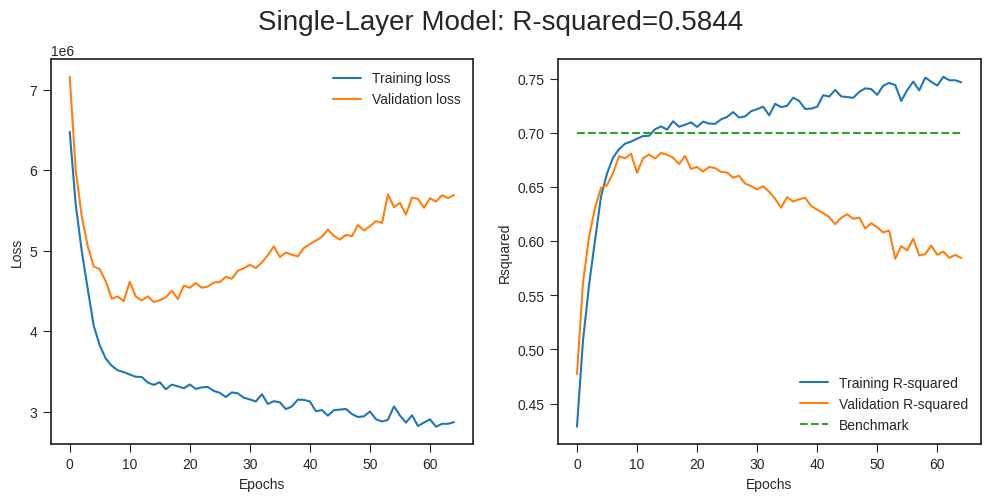

In [ ]:
# VISUALIZATION
# getting the number of epochs 
epochs = len(model_single_hist.history['loss'])

# plotting the loss and rsquared values 
style.use('seaborn-ticks')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle(f"Single-Layer Model: R-squared={r2_evaluate(model_single, xtest, ytest):.4f}", fontsize=20)

# subplot to see progression of loss
ax[0].plot(model_single_hist.history['loss'], label='Training loss')
ax[0].plot(model_single_hist.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# subplot to see progression of rsquared
ax[1].plot(model_single_hist.history['r_squared'], label='Training R-squared')
ax[1].plot(model_single_hist.history['val_r_squared'], label='Validation R-squared')
ax[1].plot([0.7 for i in range(epochs)], label='Benchmark', linestyle='--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Rsquared')
ax[1].legend()

plt.show()

# 3. Multi-Layer Neural Network

We can see, not only is the model terrible on training set, but also sufferes from overfitting.
From the plot above , we can observe a single layer neural network (NN) performs terribly on the training and suffers from overfitting.

To overcome these issues, we will use Multi-Layer NNs. Adding another layer significantly improves the R-squared value: for single layer, 75% training R-squared was attained around 100th epoch, but for a three-layer NN, it was atttained around 20th epoch.
</br>
Because of this, we will increase the benchmark to 80%.

## 3.1 Model 1.0: Baseline
We start with three layers since increasing the layers decreases the value of R-squared.
The architecture of the first model is as follows:

*   Number of Layers: 3
*   Number of Neurons in Layer 1: 64
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 2: 32
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 3: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared


In [ ]:
# model architecture
model1 = Sequential([
    Dense(64, input_shape=input_shape, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# model compiliation 
model1.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])

# model training
model1_hist = model1.fit(xtrain, ytrain, epochs=250, batch_size=batch_size, validation_data=(xtest, ytest), callbacks=[early_stop], verbose=0)

 1/41 [..............................] - ETA: 3s

<ipython-input-301-679a4c6fcfbf>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-ticks')


41/41 [==============================] - 0s 2ms/step


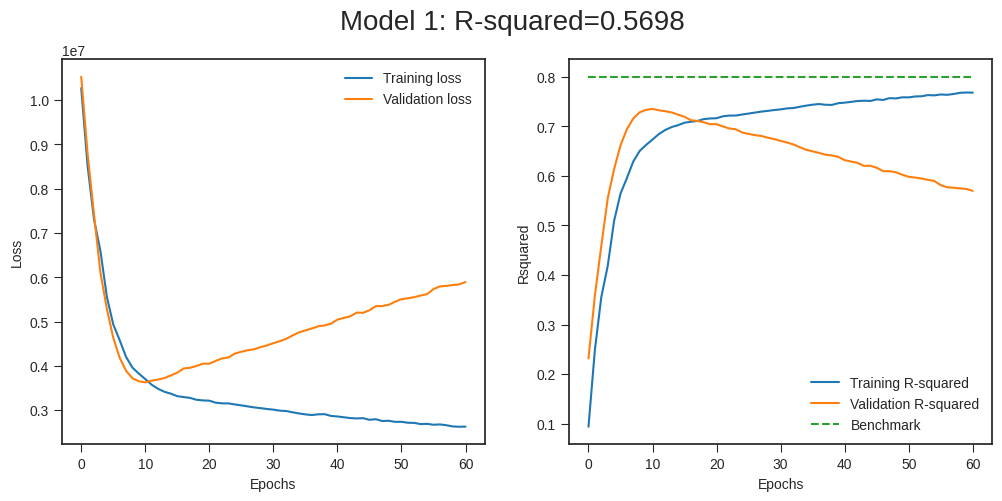

In [ ]:
# VISUALIZATION
# getting the number of epochs 
epochs = len(model1_hist.history['loss'])

# plotting the loss and rsquared values 
style.use('seaborn-ticks')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle(f"Model 1: R-squared={r2_evaluate(model1, xtest, ytest):.4f}", fontsize=20)

# subplot to see progression of loss
ax[0].plot(model1_hist.history['loss'], label='Training loss')
ax[0].plot(model1_hist.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# subplot to see progression of rsquared
ax[1].plot(model1_hist.history['r_squared'], label='Training R-squared')
ax[1].plot(model1_hist.history['val_r_squared'], label='Validation R-squared')
ax[1].plot([BENCHMARK for i in range(epochs)], label='Benchmark', linestyle='--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Rsquared')
ax[1].legend()

plt.show()

## 3.2 MODEL 2.0: Model Architecture
The plots of the first model indicate that the model is not fitting the dataset very well. To overcome this issue, we determined the best number of neurons for each layer using grid search. 

The improved model architecture is as follows:
*   Number of Layers: 3
*   Number of Neurons in Layer 1: 24
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 2: 
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 3: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared 


In [ ]:
# performing grid search for the best combination of number of neurons in each layer
layers = [24, 32, 64]
r2_list = [0]
best_model = model1
models = []
histories = []


for num_neuron1 in layers:
  for num_neuron2 in layers:
    print('\n')
    print(f" MODEL, LAYER 1 NEURONS: {num_neuron1}, LAYER 2 NEURONS: {num_neuron2}")
    model_test = Sequential([
      Dense(num_neuron1, input_shape=input_shape, activation='relu'),
      Dense(num_neuron2, activation='relu'),
      Dense(1, activation='linear')
    ])

    # model compilation
    model_test.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])
    
    # model training
    model_hist = model_test.fit(xtrain, ytrain, epochs=250, batch_size=batch_size, validation_data=(xtest, ytest), callbacks=[early_stop], verbose=0)
    models.append(model_test)
    histories.append(model_hist)

    # calculating the R-squared
    r2 = r2_evaluate(model_test, xtest, ytest)
    print(f"CURRENT R-SQUARED: {r2}, MAX R-SQUARED: {np.max(r2_list)}")
    r2_list.append(r2)

    # if the R-squared value of current model is higher than previous ones, save current model as the best model
    if r2 > np.max(r2_list):
      best_model = model_test
      # print(f'CURRENT BEST MODEL, Layer1: {num_neuron1}, Layer2: {num_neuron2}')

    
    backend.clear_session()
    print('SESSION CLEARED')



 MODEL, LAYER 1 NEURONS: 24, LAYER 2 NEURONS: 24
41/41 [==============================] - 0s 1ms/step
CURRENT R-SQUARED: 0.5906882131045903, MAX R-SQUARED: 0
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 24, LAYER 2 NEURONS: 32
41/41 [==============================] - 0s 2ms/step
CURRENT R-SQUARED: 0.6458947972400293, MAX R-SQUARED: 0.5906882131045903
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 24, LAYER 2 NEURONS: 64
41/41 [==============================] - 0s 1ms/step
CURRENT R-SQUARED: 0.6231680052277071, MAX R-SQUARED: 0.6458947972400293
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 32, LAYER 2 NEURONS: 24
41/41 [==============================] - 0s 1ms/step
CURRENT R-SQUARED: 0.5571866114150914, MAX R-SQUARED: 0.6458947972400293
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 32, LAYER 2 NEURONS: 32
41/41 [==============================] - 0s 1ms/step
CURRENT R-SQUARED: 0.575603838564496, MAX R-SQUARED: 0.6458947972400293
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 32, LAYER 2 NEURONS: 64
41

In [ ]:
print(f"MAX R-SQUARED: {max(r2_list)}")

MAX R-SQUARED: 0.6458947972400293


In [ ]:
r2_evaluate(models[1], xtest, ytest)

41/41 [==============================] - 0s 1ms/step


0.5960315856923591

**Observation:** From all the models, the one with the best value of R-squared 0.6458 is the model with 24 neurons in the first layer and 32 neurons in the second layer.

41/41 [==============================] - 0s 1ms/step


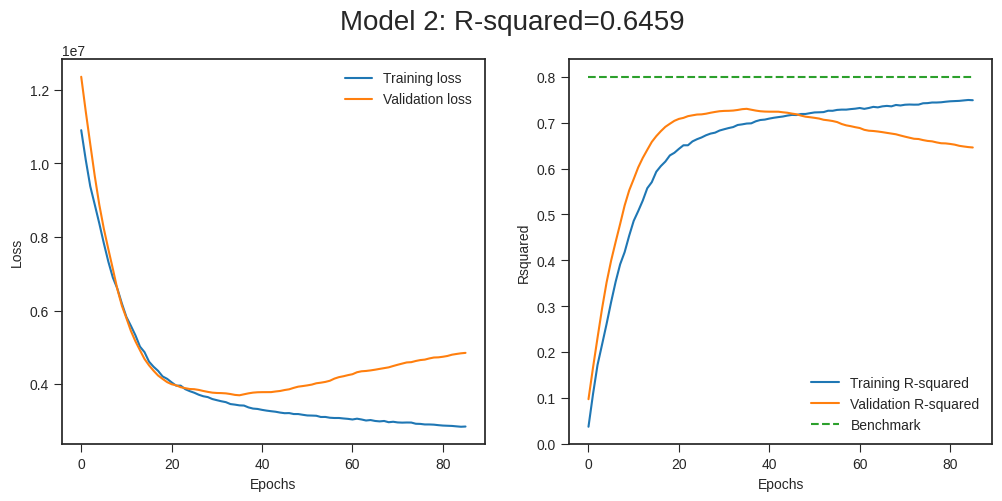

In [ ]:
# VISUALIZATION
model2 = models[1]
model2_hist = histories[1]

# getting the number of epochs 
epochs = len(model2_hist.history['loss'])

# plotting the loss and rsquared values 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle(f"Model 2: R-squared={r2_evaluate(model2, xtest, ytest):.4f}", fontsize=20)

# subplot to see progression of loss
ax[0].plot(model2_hist.history['loss'], label='Training loss')
ax[0].plot(model2_hist.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# subplot to see progression of rsquared
ax[1].plot(model2_hist.history['r_squared'], label='Training R-squared')
ax[1].plot(model2_hist.history['val_r_squared'], label='Validation R-squared')
ax[1].plot([BENCHMARK for i in range(epochs)], label='Benchmark', linestyle='--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Rsquared')
ax[1].legend()

plt.show()

## 3.3 MODEL 3.0: DropOut
From the plots of model 2, we can observe the training R-squared and validation R-squared start to diverge. This is sign that the model is overfitting. To overcome this issue, we have utilized a regularization technique: dropout layers

The improved model architecture is as follows:
*   Number of Layers: 3
*   Number of Neurons in Layer 1: 24
*   Layer 1 Activation: ReLU
*   Layer 2: Dropout Layer, rate=0.3 
*   Number of Neurons in Layer 3: 32
*   Layer 3 Activation: ReLU
*   Layer 4: Dropout Layer, rate=0.3
*   Number of Neurons in Layer 5: 1
*   Layer 5 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared 



In [ ]:
backend.clear_session()

# changed the number of neurons both the layers to increase r-squared
model3 = Sequential([
    Dense(24, input_shape=input_shape, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# model compilation
model3.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])

# model training
model3_hist = model3.fit(xtrain, ytrain, epochs=250, batch_size=batch_size, validation_data=(xtest, ytest), callbacks=[early_stop], verbose=0)

41/41 [==============================] - 0s 1ms/step


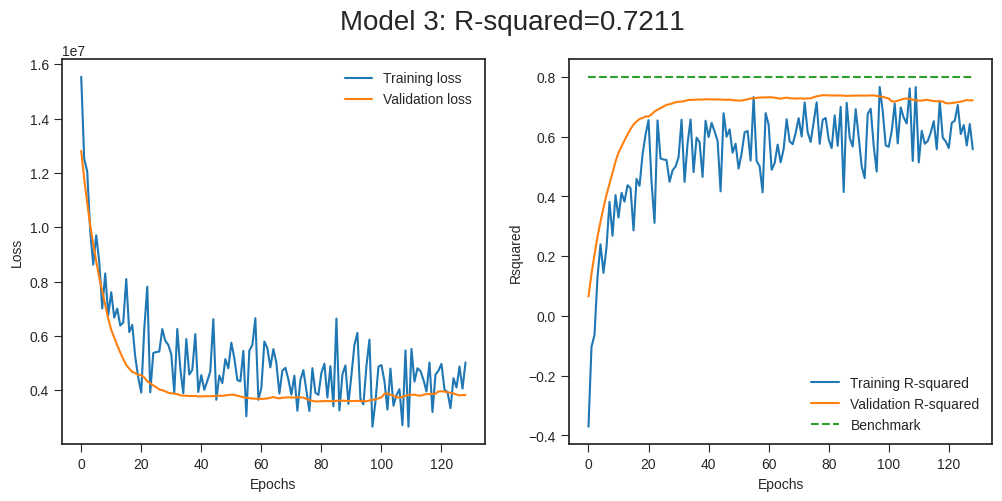

In [ ]:
# VISUALIZATION
# getting the number of epochs 
epochs = len(model3_hist.history['loss'])

# plotting the loss and rsquared values 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle(f"Model 3: R-squared={r2_evaluate(model3, xtest, ytest):.4f}", fontsize=20)

# subplot to see progression of loss
ax[0].plot(model3_hist.history['loss'], label='Training loss')
ax[0].plot(model3_hist.history['val_loss'], label='Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# subplot to see progression of rsquared
ax[1].plot(model3_hist.history['r_squared'], label='Training R-squared')
ax[1].plot(model3_hist.history['val_r_squared'], label='Validation R-squared')
ax[1].plot([BENCHMARK for i in range(epochs)], label='Benchmark', linestyle='--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Rsquared')
ax[1].legend()

plt.show()

# 4. Conclusion
The last model we trained, model 3.0, is our final model. 

After the process of hypertuning, we were unable to reach our benchmark of 0.8, but were able to achieve a satisfactory R-squared value of 0.72. The primary reason we were unable to achieve a higher value was due to the data being too noisy and unpredictable. 

In the future we could try using more advanced Machine Learning algorithms to further optimize the outcome.
<br>
### Scatterplot:

In [ ]:
# making predictions
y_pred = model3.predict(xtest).ravel()

41/41 [==============================] - 0s 3ms/step


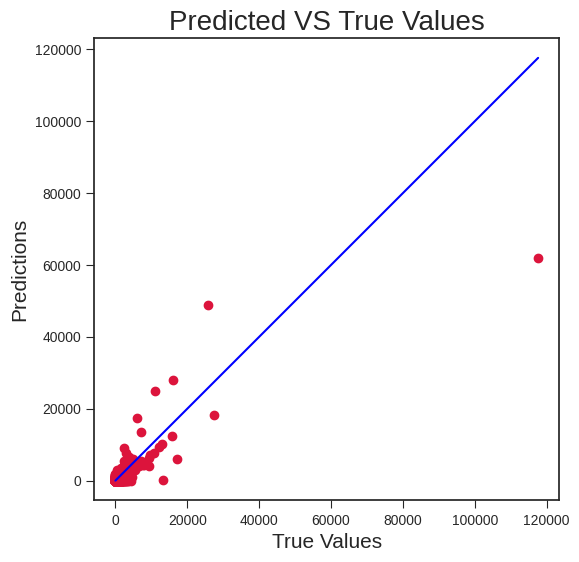

In [ ]:
# VISUALIZATION 
# predicted vs test values
plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred_avg, c='crimson')
plt.title("Predicted VS True Values", fontsize=20)

p1 = max(max(y_pred), max(ytest))
p2 = min(min(y_pred), min(ytest))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The x-axis is the actual values and the y-axis represents the predicted values. The closer the dots are located to the straight diagonal line, the better predictions are.
From the above graph we can observe that the predictions and true values lie close to the diagonal with the exception of some data points, indicating the model we have trained is satisfactory.
